In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('FinancialMarket.csv')

In [2]:
# Display the first few rows and the info to check for any target column or missing data
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              1000 non-null   float64
 1   combined_data  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


(         x  combined_data
 0  0.00000       0.003073
 1  0.01001       0.033492
 2  0.02002      -0.027269
 3  0.03003       0.176319
 4  0.04004      -0.006027,
 None,
                  x  combined_data
 count  1000.000000    1000.000000
 mean      5.000000      -1.878770
 std       2.891085       5.354206
 min       0.000000     -14.997262
 25%       2.500000      -5.728474
 50%       5.000000       0.876992
 75%       7.500000       1.802812
 max      10.000000       5.242684)

In [3]:
# Define feature (x) and target (y)
X = df[['x']].values  # Reshape as matrix
y = df['combined_data'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

In [5]:
# 2. Polynomial Regression (basis function)
degree = 3  # Set the degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [6]:
# Make predictions
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred_linear)

poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_pred_poly)

In [7]:
# Output results for comparison
print("### Model Comparison ###")
print(f"Linear Regression MSE: {linear_mse:.4f}, RMSE: {linear_rmse:.4f}, R²: {linear_r2:.4f}")
print(f"Polynomial Regression (degree {degree}) MSE: {poly_mse:.4f}, RMSE: {poly_rmse:.4f}, R²: {poly_r2:.4f}")

### Model Comparison ###
Linear Regression MSE: 9.4014, RMSE: 3.0662, R²: 0.6782
Polynomial Regression (degree 3) MSE: 1.3484, RMSE: 1.1612, R²: 0.9538


In [8]:
# Plotting the results
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

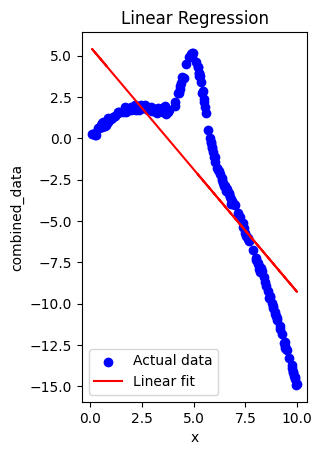

In [9]:
# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear fit')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('combined_data')
plt.legend()

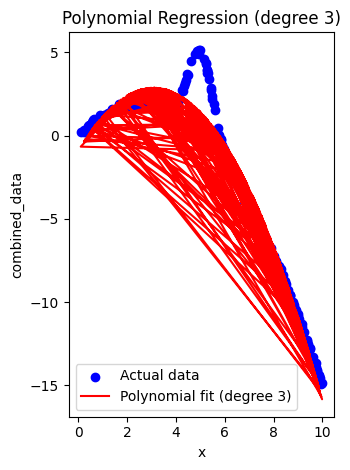

In [10]:
# Plot for Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred_poly, color='red', label=f'Polynomial fit (degree {degree})')
plt.title(f'Polynomial Regression (degree {degree})')
plt.xlabel('x')
plt.ylabel('combined_data')
plt.legend()

plt.tight_layout()
plt.show()